# Introduction

Here one will apply concepts of MLP (multilayer perceptron) and convolutional neural networks (CNN), to classify, segment adn detect objects inside images.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import torch as tc
from torchvision import datasets, transforms

c:\Users\Gustavo Fortunato\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Classification

In [2]:
MNIST = datasets.MNIST('.', train=False, 
                        transform= transforms.ToTensor(), # must be done, since MLP only uses tensors
                        #target_transform=None, keeping the data as int
                        download=True)

In [3]:
MNIST[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

As one can see the last number is the label of the tensor. In this case it is the number 7. A better way to organize this data is to tuple it.

In [4]:
data, label = MNIST[0]
print("Types of data and labels are respectively:", type(data), type(label))
print(f"Size of the of the data is {data.size()}, with label {label}")

Types of data and labels are respectively: <class 'torch.Tensor'> <class 'int'>
Size of the of the data is torch.Size([1, 28, 28]), with label 7


This first number in the size of the data (1) refers to the color channel of the data, meaning that the depth of the image is 1. To better visualize the data, one will plot them.

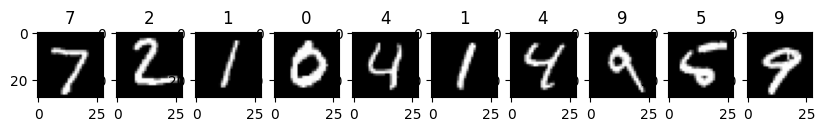

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(10,4))
for i in range(10):
    data, label =MNIST[i]
    axs[i].imshow(data[0], cmap='gray')
    axs[i].set_title(str(label))

Based on the image above, one can see that there could only be 10 different digits. Considering that, the last layer of the neural network, must have 10 fully connected perceptrons. This will surelly be aplicable to classification problems like this.

## Detection

To better understand detection problems, one will use the Pascal, Visual Object CLasses (VOC). Detection is the process of searching in an image certain object.

In [6]:
#460mb file
VOC = datasets.VOCDetection('.',
                             year='2007',
                             image_set='train',
                             download=True,
                             transform= transforms.ToTensor()
                                )

Using downloaded and verified file: .\VOCtrainval_06-Nov-2007.tar
Extracting .\VOCtrainval_06-Nov-2007.tar to .


In [7]:
data, label = VOC[0]
print("Types of data and labels are respectively:", type(data), type(label))
print(f"Size of the of the data is {data.size()}")

Types of data and labels are respectively: <class 'torch.Tensor'> <class 'dict'>
Size of the of the data is torch.Size([3, 333, 500])


This data has depth 3, since it uses RGB color system, so 3 colors are needed. To plot the data, one will need to permute it, since torch uses channel first and the matplotlib uses the opposite.

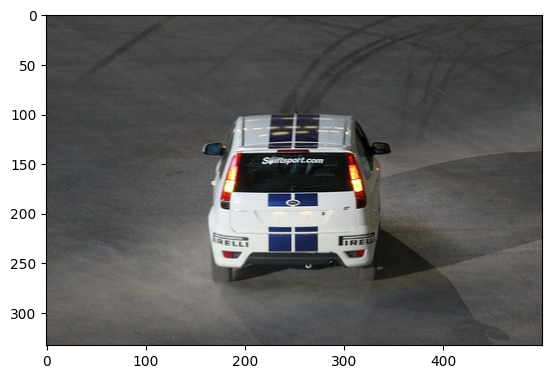

In [8]:
data = data.permute(1,2,0)
plt.imshow(data)

In [9]:
label

{'annotation': {'folder': 'VOC2007',
  'filename': '000012.jpg',
  'source': {'database': 'The VOC2007 Database',
   'annotation': 'PASCAL VOC2007',
   'image': 'flickr',
   'flickrid': '207539885'},
  'owner': {'flickrid': 'KevBow', 'name': '?'},
  'size': {'width': '500', 'height': '333', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'car',
    'pose': 'Rear',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]}}

Inside the label, there is an object called bndbox, with 4 values. Those values of xy min and xy max are points in the image which will be used to tell where the detection is.

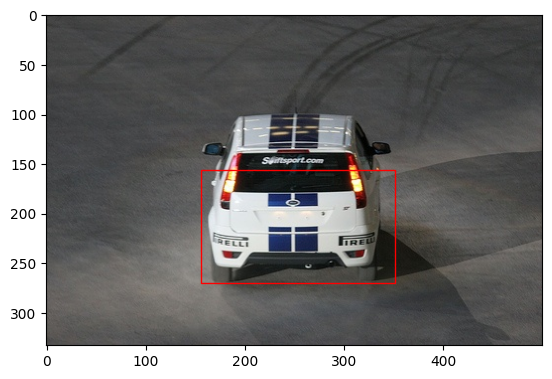

In [10]:
# plotting the first object (car) detection
bbox = label['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['xmin'])

fig, ax = plt.subplots()
ax.imshow(data)

w, h = xmax-xmin, ymax-ymin

rect = patches.Rectangle((xmin, ymin), w,h, fill=False, color='r')

ax.add_patch(rect)

Ok, one can see the car and the person, but how can a neural network be taught to see, detect a car?

To know that there is a car in the image, the neural network needs to classify the image. After that it needs to detect the class car in it. Knowing which points of the image corresponds to the object classified 4 values are needed to create a rectangle around the detected object. The final layer of the CNN will have 4  perceptrons.

## Segmentation

This is a more advanced way to determine where is the detected object and also what are the pixels that belongs to that object.

In [11]:
# same file as before
VOCs = datasets.VOCSegmentation('.',
                                year='2007',
                                image_set='val',
                                download=True,
                                transform=transforms.ToTensor(),
                                target_transform= transforms.ToTensor() #now the target must be transformed
)

Using downloaded and verified file: .\VOCtrainval_06-Nov-2007.tar
Extracting .\VOCtrainval_06-Nov-2007.tar to .


In [12]:
data, label = VOCs[0]
print("Types of data and labels are respectively:", type(data), type(label))
print(f"Size of the of the data is {data.size()}, and the size of labels is: {label.size()}")

Types of data and labels are respectively: <class 'torch.Tensor'> <class 'torch.Tensor'>
Size of the of the data is torch.Size([3, 375, 500]), and the size of labels is: torch.Size([1, 375, 500])


Now the data and label have different channel value, this happens because of the segmentation binary mask, which has only one color or no color.

This mask will segment the object detected and will mark the pixes that belong to that segment of detected object.

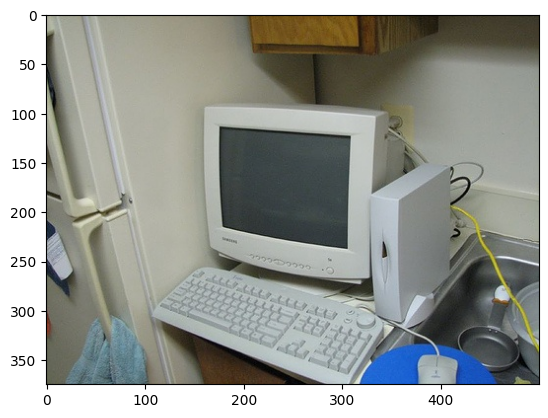

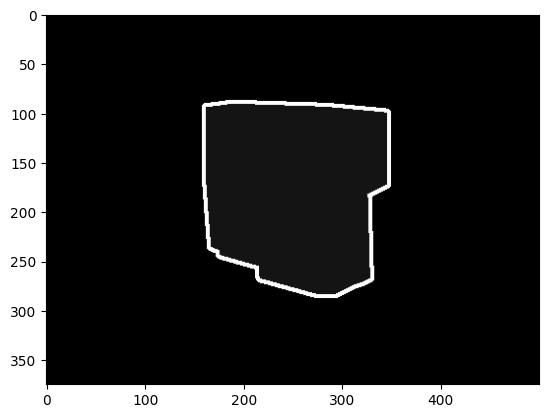

In [13]:
data = data.permute(1,2,0)
plt.figure()
plt.imshow(data)

plt.figure()
plt.imshow(label[0], cmap='gray')


This is the border segmentation of a PC. These were examples of CNN that uses 2d convolutions.

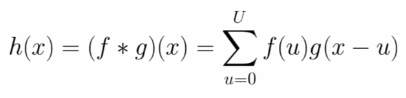


This is the function that defines what a convolution is.

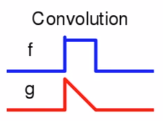

Visually this is what happens to the function behavior. f is the data and g is a filter that will be inverted.

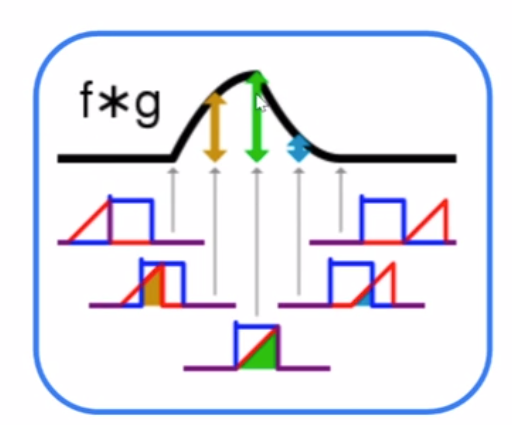

This will allow one to find the best join between the functions.

Now one will create a simple CNN using Numpy and SciPy.

The data one will be using is a generalization about the behavior or aceleromethers inside cellphones, which tells one if the cellphone is static, or moving, but how can one confirm those states?

Reference:https://www.sciencedirect.com/science/article/pii/S0263224123007820

# 

# 1D CNN with Numpy and Scipy

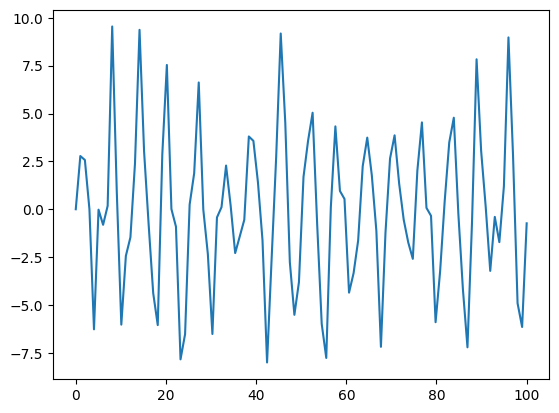

In [14]:
import numpy as np
from scipy.signal import convolve

x = np.linspace(0, 100, 100)
y = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure()
plt.plot(x, y)

Consider that the 0 is when the cell is not moving and each noise in the sigmoid function is a movement, but the crescent noises are steps.

In [15]:
def show(values, title):
    plt.figure(figsize=(len(values),2))
    plt.imshow(values[np.newaxis,:], cmap='gray')
    for k, s in enumerate(values):
        plt.text(k, 0, '{:.2f}'.format(s), fontsize=16, color='red', ha='center', va='center')
    plt.title(title, fontsize=18)
    plt.yticks([])

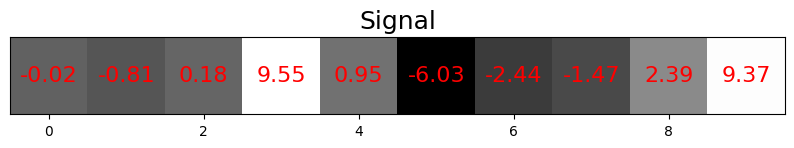

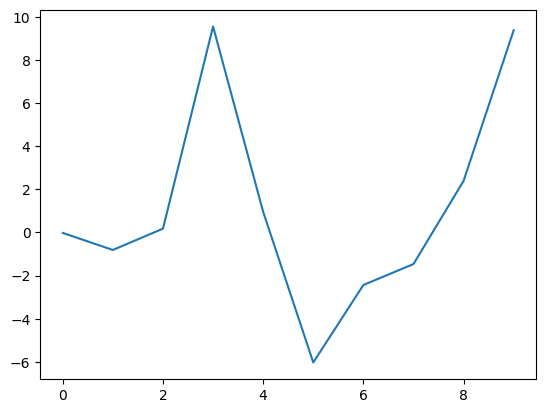

In [16]:
signal = y[5:15]
show(signal, 'Signal')
plt.figure()
plt.plot(signal)

The signal tells one a grayscale map based on the intensity of the signals that the function is returning. So, the CNN would identify the intervals that are crescent, and for this it needs a Kernel.

## Kernel

Considering the image processing problem that one has, a kernel will be a convolutional filter, which is a n-dimensional matrix. This Kernel will measure the most resembling signals and it will search for most resembling crescent patterns.

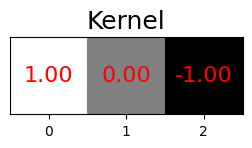

In [17]:
kernel = np.asarray([1,0, -1])

show(kernel, 'Kernel')

Considering the formula presented before, the kernel needs to be inverted to achieve its goal.

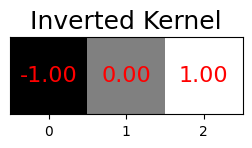

In [18]:
# inverted Kernel
inverted_kernel = np.flip(kernel)
show(inverted_kernel, 'Inverted Kernel')

Now one will move this kernel along the axis of the noisy sigmoidal function, to make a clear view of the process.

Current moving step 0 resulted in 0.20


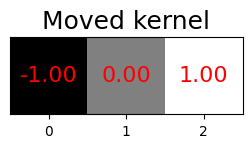

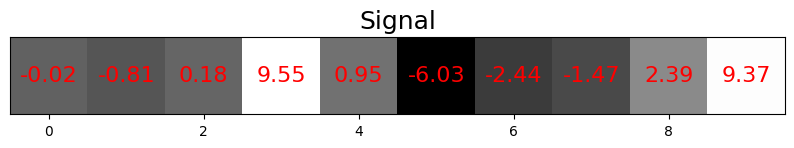

In [19]:
moving_steps = 0 #same as the first plot
movement = [float('nan')] * moving_steps
moved_kernel = np.hstack((movement, inverted_kernel))

show(moved_kernel, 'Moved kernel')
show(signal, 'Signal')

convolution = (-1*signal[moving_steps]) + 0  + (signal[moving_steps+2])

print(f'Current moving step {moving_steps} resulted in {convolution:.2f}')

The kernel transformed the first 3 values of the signal, resulting in the first convolution.

In [20]:
moving_steps = -1 # it will get +1, so 0 must be the first value
convolution_values= []
for i in range(len(signal)-2): # kernel uses 3 values, so the max len must be reduced    
    moving_steps += 1
    convolution = (-1*signal[moving_steps]) + 0  + (signal[moving_steps+2])
    convolution_values.append(convolution)
    print(f'Convolution {moving_steps} resulted in {convolution:.2f}')

Convolution 0 resulted in 0.20
Convolution 1 resulted in 10.36
Convolution 2 resulted in 0.78
Convolution 3 resulted in -15.57
Convolution 4 resulted in -3.39
Convolution 5 resulted in 4.56
Convolution 6 resulted in 4.83
Convolution 7 resulted in 10.84


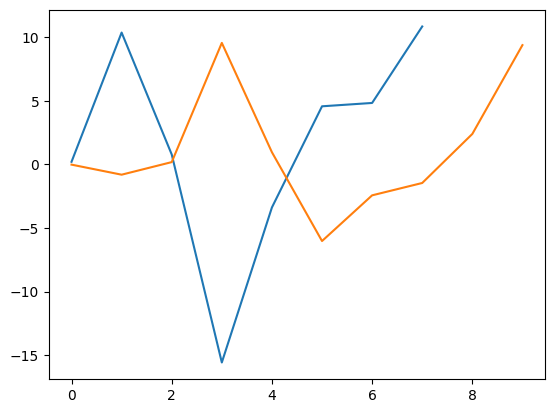

In [21]:
plt.plot(convolution_values)
plt.plot(signal)

This is the math behind a CNN transformation and also the resulting transformation done by it. Now one will show the usual convolution calculation that can be done faster with SciPy.

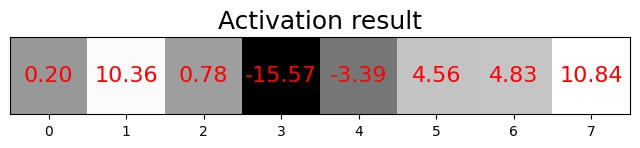

In [22]:
convolution_scipy = convolve(signal, kernel, mode='valid')
show(convolution_scipy, 'Activation result')

Considering the convolution, the highest values determines where a crescent behavior was stronger.

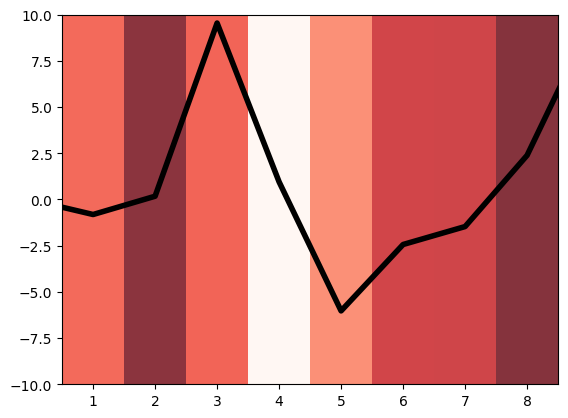

In [23]:
plt.figure()
plt.plot(signal, color='k', linewidth=4)
plt.imshow(convolution_scipy[np.newaxis, :], cmap='Reds', aspect='auto',
               alpha=0.8, extent=(0.5, 8.5, -10, 10))

Here the red indicates where the signal and the convolution were more crescent. Now for the whole signal:

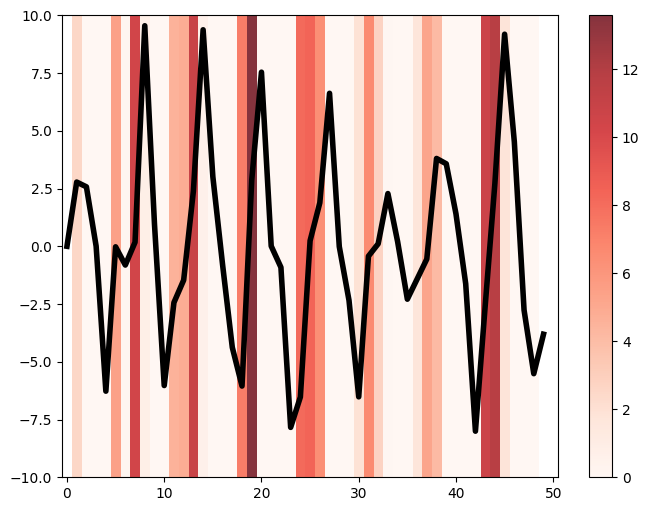

In [24]:
convolution_scipy = convolve(y[:50], kernel, mode='valid')
convolution_scipy[convolution_scipy< 0] = 0

plt.figure(figsize=(8,6))
plt.plot(y[:50], color='k', linewidth=4)
plt.imshow(convolution_scipy[np.newaxis, :], cmap='Reds', aspect='auto',
               alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

This simple CNN taught one what is behind the convolution( ) method of SciPy, while being useful to be applied in noisy sigmoidal functions.

# 2D Convolution

Now the Kernel must move in 2D, so it must be like the code bellow.

In [25]:
# Identity Kernel
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

# Edge Detection Kernel (horizontal edge)
horizontal_edge_kernel = np.array([[-1, -1, -1],
                                   [ 0,  0,  0],
                                   [ 1,  1,  1]])

# Edge Detection Kernel (vertical edge)
vertical_edge_kernel = np.array([[-1,  0,  1],
                                 [-1,  0,  1],
                                 [-1,  0,  1]])

# Box Blur Kernel
box_blur_kernel = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

# Sharpening Kernel
sharpening_kernel = np.array([[0, -1, 0],
                             [-1,  5, -1],
                             [0, -1, 0]])

# Emboss Kernel
emboss_kernel = np.array([[-2, -1,  0],
                         [-1,  1,  1],
                         [ 0,  1,  2]])


In [26]:
from skimage import io, color, transform, data
from scipy.signal import convolve

Now one will use the kernels to detect borders in a brick wall.

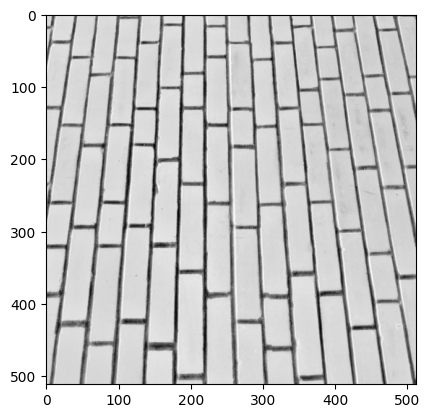

In [27]:
img = data.brick()
plt.imshow(img, cmap='Greys')

In [28]:
# updating the function for a 2D array
def show2D(values, title):
    plt.figure(figsize=(len(values),len(values)))
    plt.imshow(values, cmap='gray')
    for i, row in enumerate(values):
        for j, col in enumerate(row):
            plt.text(j, i, '{:.2f}'.format(col), fontsize=16, color='red', ha='center', va='center')
            plt.title(title, fontsize=18)
            plt.xticks([])
            plt.yticks([])

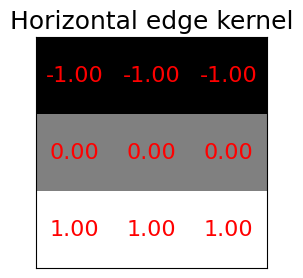

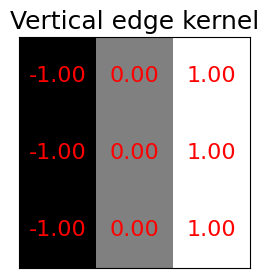

In [29]:
show2D(horizontal_edge_kernel, 'Horizontal edge kernel')
show2D(vertical_edge_kernel, 'Vertical edge kernel')

Text(0.5, 1.0, 'Convolved vertical image')

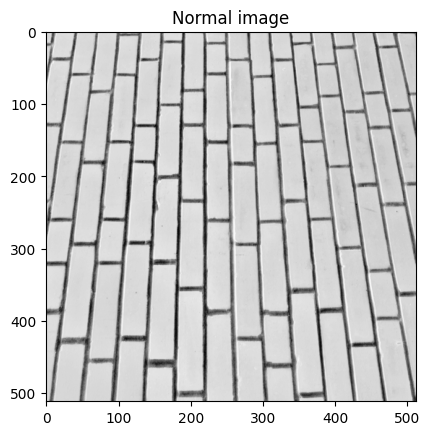

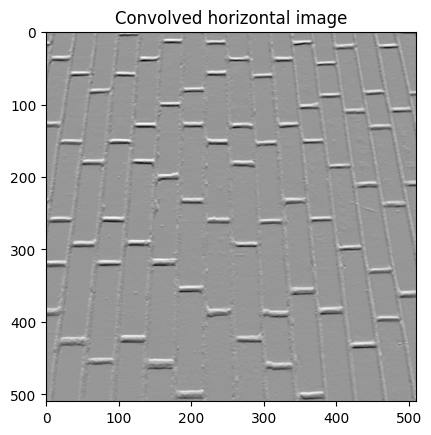

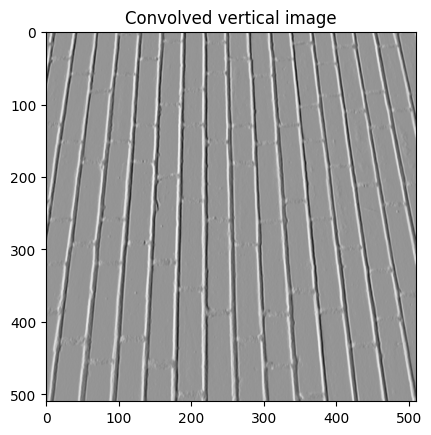

In [30]:
border_map_h =  convolve(img, horizontal_edge_kernel, mode='valid')
plt.imshow(img, cmap='Greys')
plt.title('Normal image')

plt.figure()
plt.imshow(border_map_h, cmap='Greys')
plt.title('Convolved horizontal image')

border_map_v =  convolve(img, vertical_edge_kernel, mode='valid')

plt.figure()
plt.imshow(border_map_v, cmap='Greys')
plt.title('Convolved vertical image')

one can notice the clear change between the convolutions of vertical and horizontal borders. The same principle of 1D convolution happens to 2D convolution, but now there is another dimension to count. What if things get a little more complicated?

## Advancing in 2D Convolution

One will use an image of a dog to use more advanced filters, achieving different outputs.

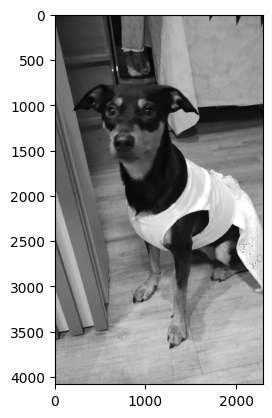

In [31]:
img = io.imread('dog.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

The first filer one will be using is called the Gaussian Blur filter, defined in the expression bellow:

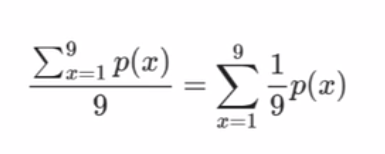

This filter will create an average value based on the number of pixels of a 3x3 matrix, so each value will be: value * 1/9

In [32]:
# another adjustment in the function
def show2D_v2(img, kernel, convolution, title):
    fig, axs = plt.subplots(1, 3, figsize =(10,5))
    plot = [img, kernel, convolution]
    title = ['image', title, 'Activated image']
    for k, ax in enumerate(axs):
        ax.imshow(plot[k], cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(title[k])
        for i, row in enumerate(kernel):        
            for j, col in enumerate(row):
                axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

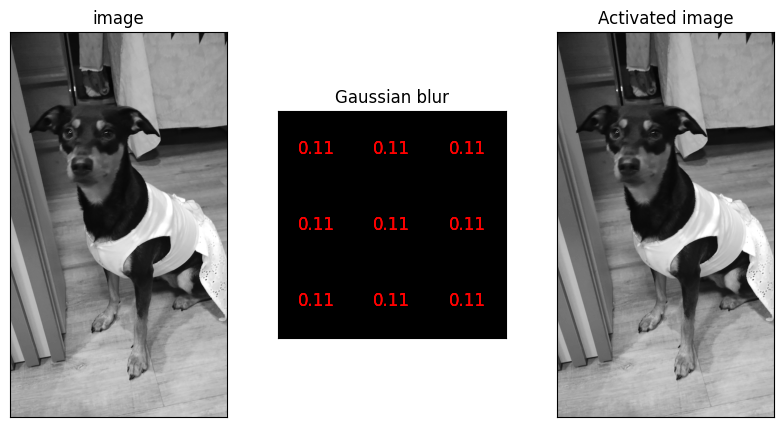

In [33]:
s = 3 #kernel size
kernel_gaussian = np.zeros((s,s))
kernel_gaussian[:] = 1.0/(s**2)

convolution = convolve(img, kernel_gaussian, mode='valid')
show2D_v2(img, kernel_gaussian, convolution, 'Gaussian blur')

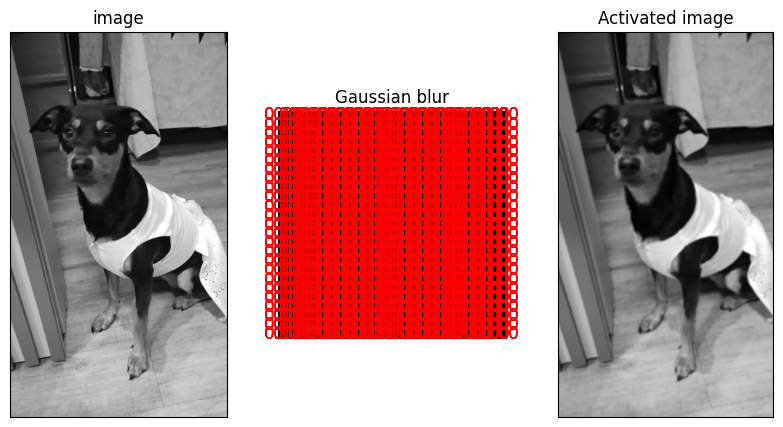

In [34]:
s = 25 #kernel size
kernel_gaussian = np.zeros((s,s))
kernel_gaussian[:] = 1.0/(s**2)

convolution = convolve(img, kernel_gaussian, mode='valid')
show2D_v2(img, kernel_gaussian, convolution, 'Gaussian blur')

The bigger the kernel size used, the higher is the blur in the image. This happens because of the transformation caused in various pixels, which creates a loss of information and detail, causing the blur effect.

## Sobel kernel

This kernel is almost the same as horizontal and vertical ones used before, but it is a little more organized.

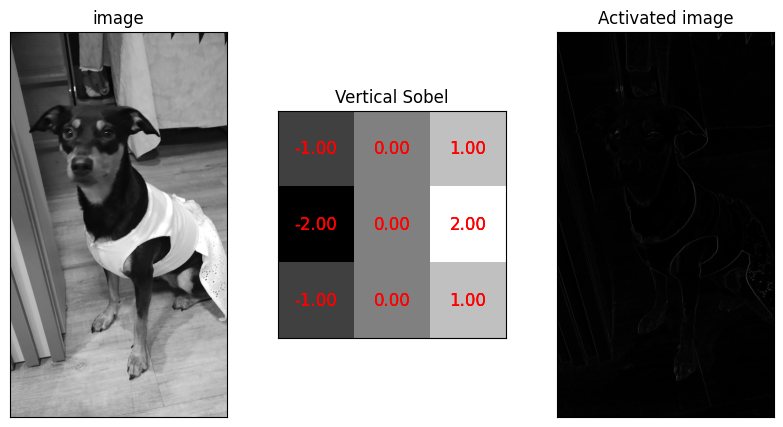

<Figure size 640x480 with 0 Axes>

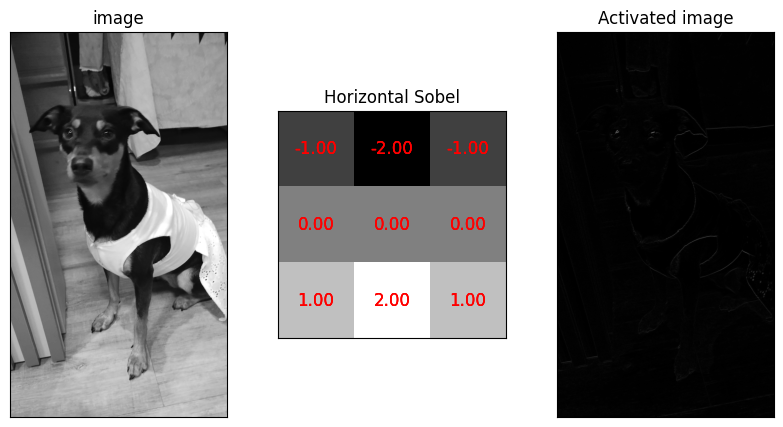

In [35]:
vertical_sobel = np.zeros((3,3))
vertical_sobel[:,0] =-1
vertical_sobel[:,2] = 1
vertical_sobel[1, [0,2]] = [-2, 2]

horizontal_sobel = np.zeros((3,3))
horizontal_sobel[0,:] =-1
horizontal_sobel[2,:] = 1
horizontal_sobel[[0,2], 1] = [-2, 2]

convolution = convolve(img, vertical_sobel, mode='valid')
show2D_v2(img, vertical_sobel,
           np.abs(convolution), #using absolute values for better visualization results
           'Vertical Sobel')

plt.figure()
convolution = convolve(img, horizontal_sobel, mode='valid')
show2D_v2(img, horizontal_sobel,
           np.abs(convolution), #using absolute values for better visualization results
           'Horizontal Sobel')

With an accurate look, one can see white borders of what was a dog. The first plot has more vertical borders and in the second one more horizontals.

# Laplace

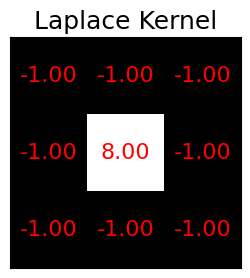

In [36]:
laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
show2D(laplace, 'Laplace Kernel')

This kernel will transform the vertical and horizontal borders of the image.

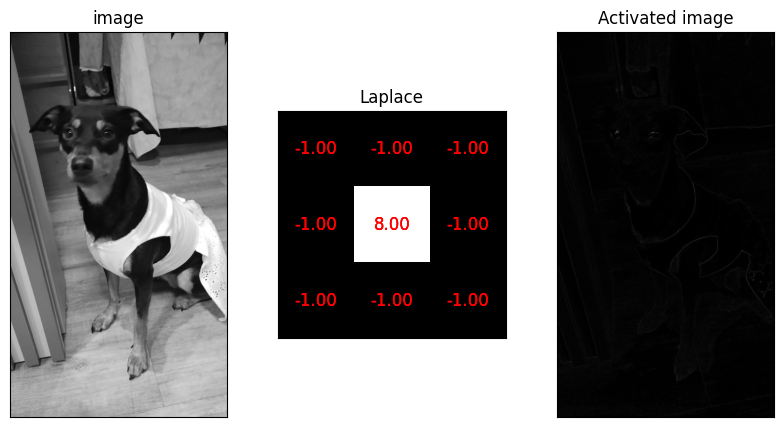

In [37]:
convolution = convolve(img, laplace, mode='valid')
show2D_v2(img, laplace,
           np.abs(convolution), #using absolute values for better visualization results
           'Laplace')

# Complex convolutions

The basics of image convolution are using the borders of the image as the complexity increases the process of convolution can recognize other patterns, like honey combs, dog heads, and other objects. 

One will try to extract the pattern of the dogs eyes.

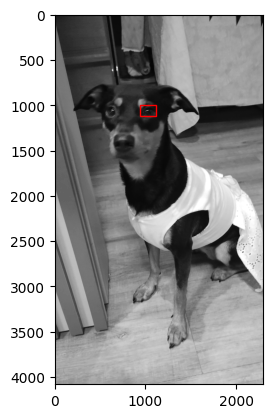

In [38]:
img = io.imread('dog.jpg')
img= img[:,:,0]
rectangle = [1000,1115,940,1115]

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((rectangle[2],rectangle[0]),
                       (rectangle[3]-rectangle[2]),
                       (rectangle[1]-rectangle[0]), color='red', fill=False))


One found the eye of the dog and will now convert the patch into an image

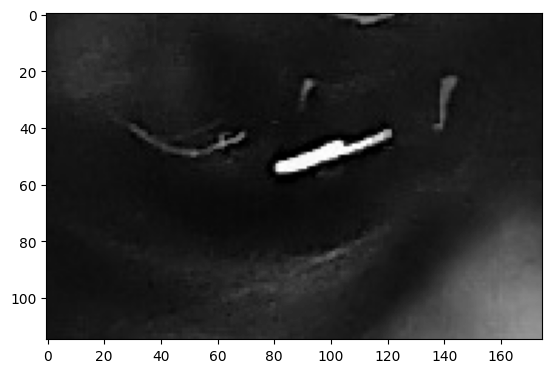

In [39]:
patch = img[rectangle[0]:rectangle[1], rectangle[2]:rectangle[3]]
# these calculations must be normalized, based on the mean of the pixels
patch = patch - patch.mean()
# inverting the pixels, so they can be inverted to normal by the convolution process
patch = np.flip(patch) 
plt.imshow(patch, cmap='gray')

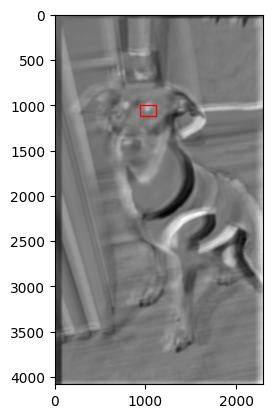

In [40]:
convolution = convolve(img, patch,mode='same')

fig, ax = plt.subplots()
ax.imshow(convolution, cmap='gray')
ax.add_patch(patches.Rectangle((rectangle[2],rectangle[0]),
                       (rectangle[3]-rectangle[2]),
                       (rectangle[1]-rectangle[0]), color='red', fill=False))


Here one used the eye of the dog as a kernel to convolve its image, returning a transformed image. Note that the place where the rectangle is has brighter pixels in the center.

The problem here is that other parts were also brightened, and those spots are not the dog's eyes. This problem, could be fixed, by a treatment, before the convolution process is done.

# Creating a CNN

Now that one knows what and how to do a convolution, its time to further advance and create a neural network.

One will be using the brick image and an astronaut image.

In [41]:
from torch import nn

(512, 512) (512, 512, 3)


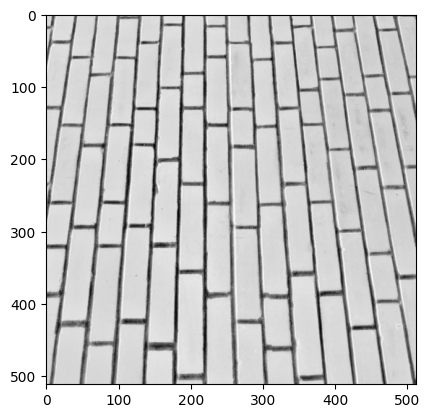

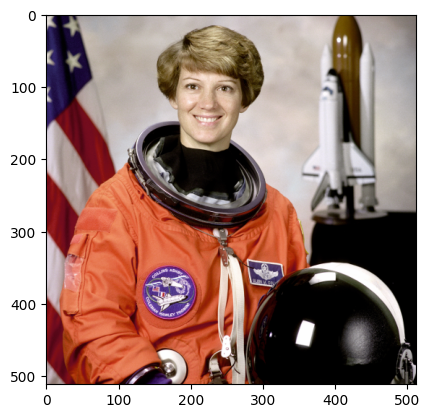

In [42]:
brick = data.brick()
astronaut = data.astronaut()

plt.imshow(brick, cmap='Greys')
plt.figure()
plt.imshow(astronaut)

print(brick.shape, astronaut.shape)

## Single channel image (Gray scale)

The first image will be single channel in a gray scale and the astronaut image will have all its colors.

In [43]:
CNN_brick = nn.Conv2d(
    in_channels=1,       # Number of input channels (typically 1 for grayscale images)
    out_channels=16,    # Number of output channels (the number of filters)
    kernel_size=3,      # Size of the convolutional kernel (3x3 in this case)
    stride=1,           # Stride = How much pixels will the kernel move
    padding=0           # Extra H and W outer layer of pixels with black color
)
brick_tensor = tc.Tensor(brick)

print(brick_tensor.size())

torch.Size([512, 512])


A convolution network expects an input of size BxCxHxW, which stands for: Batch size, Channel size, Height and Width. Currently one only has HxW.

In [44]:
brick_tensor = brick_tensor.view(1,1,brick_tensor.size(0), brick_tensor.size(1))
print(brick_tensor.size())

torch.Size([1, 1, 512, 512])


In [45]:
activation_map = CNN_brick(brick_tensor)
activation_map.size()

torch.Size([1, 16, 510, 510])

Here one should be aware of what it did before. By using padding=0 the image lost 2 pixels in height and width. But why, one asks?

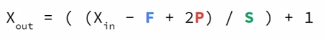

The formula above describes activation map size height of width, since both have the same values. Considering that Xin is the original size (512), F is the field of view or kernel size of 3, P is the padding, in other words 0 and S is the Stride, that is 1.

When padding is 0 with kernel size of 3, the final activation map size, will lose 2 pixels. This could significantly affect the quality of the information obtained in the output of the CNN.

In [46]:
for i in range(1,11):
    Xin = 512
    F = 0
    pixels_lost =Xin- ((Xin- (F+i) +(2*i))/ i )+1
    print(f'i value {i}, pixels_ lost {pixels_lost}')

i value 1, pixels_ lost 0.0
i value 2, pixels_ lost 256.0
i value 3, pixels_ lost 341.33333333333337
i value 4, pixels_ lost 384.0
i value 5, pixels_ lost 409.6
i value 6, pixels_ lost 426.6666666666667
i value 7, pixels_ lost 438.8571428571429
i value 8, pixels_ lost 448.0
i value 9, pixels_ lost 455.1111111111111
i value 10, pixels_ lost 460.8


As one can see as the values of F, P, and S increase at the same rate, the loss of pixels are increased, but having at least pad=1 there is no pixel loss.

In [47]:
CNN_brick = nn.Conv2d(
    in_channels=1,       # Number of input channels (typically 1 for grayscale images)
    out_channels=16,    # Number of output channels (the number of filters)
    kernel_size=3,      # Size of the convolutional kernel (3x3 in this case)
    stride=1,           # Stride = How much pixels will the kernel move
    padding=1           # Extra H and W outer layer of pixels with black color
)

activation_map = CNN_brick(brick_tensor)
activation_map.size()

torch.Size([1, 16, 512, 512])

# Triple channel image (colored)

A very common mistake one can do when implementing a CNN is to forget the size channels



In [48]:
astronaut_tensor = tc.Tensor(astronaut)
# this is very important and a common error is not doing it
# the channel will now be the first value   C  H  W
astronaut_tensor = astronaut_tensor.permute(2, 0 ,1).unsqueeze(0)

CNN_astronaut = nn.Conv2d(
    in_channels=3,       # now this must be 3
    out_channels=16,    
    kernel_size=3,      
    stride=1,           
    padding=1           
)

activation_map_astronaut = CNN_astronaut(astronaut_tensor)
activation_map_astronaut.size()

torch.Size([1, 16, 512, 512])

## Pooling

This is subsample operation of the image,  this will help reducing the computational cost and the risk of overfitting the CNN.

In [49]:
pool = nn.MaxPool2d(2, stride=1)
output = pool(activation_map_astronaut)
output.size()

torch.Size([1, 16, 511, 511])

Here the stride=1 makes one looses 1 pixel of information. That is not a very significant computational gain...What if stride=2 is used?

In [50]:
pool = nn.MaxPool2d(2,stride=2)
output = pool(activation_map_astronaut)
output.size()

torch.Size([1, 16, 256, 256])

Now one reduced by half the amount of pixels this surelly will impact computational power.

# Batch normalization and full CNN

This is a process to reduce dispersion during the training process, which allows one to control the distribution of the data. In addition, this process is also a new layer of perceptrons making it possible to extract correlations and new models.

In [51]:
net = nn.Sequential(
    nn.Conv2d(3,6,kernel_size=5),
    nn.BatchNorm2d(6),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),

    nn.Conv2d(6,16,kernel_size=5),
    nn.BatchNorm2d(16),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),

    nn.Conv2d(16,120,kernel_size=5),
    nn.BatchNorm2d(120),
    nn.Tanh(),
    nn.Flatten(),

    nn.Linear(120,84),
    nn.Tanh(),    
    nn.Linear(84, 10)

)
print(net)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Tanh()
  (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (9): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Tanh()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): Tanh()
  (14): Linear(in_features=84, out_features=10, bias=True)
)


This NN is based on the LeNet5, the first CNN that was created (https://ieeexplore.ieee.org/document/726791). It was first aplied in 1988, and one will be using it .

## Train and test

Now one will train the model and explain its behavior.

In [52]:
args= {
    'epoch_num': 30, #already tested and its ok, more than that and the model will start to overfit.
    'lr': 1e-3,
    'weight_decay': 5e-4,
    'batch_size': 1225,
}


# checking if a GPU is available, since it will be better for tensor calculations
if tc.cuda.is_available():
    args['device'] = tc.device('cuda')
else:
    args['device'] = tc.device('cpu')

print(args['device'])
net.to(args['device']) #sending the CNN to GPU

cuda


Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Tanh()
  (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (9): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Tanh()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): Tanh()
  (14): Linear(in_features=84, out_features=10, bias=True)
)

Files already downloaded and verified
Files already downloaded and verified


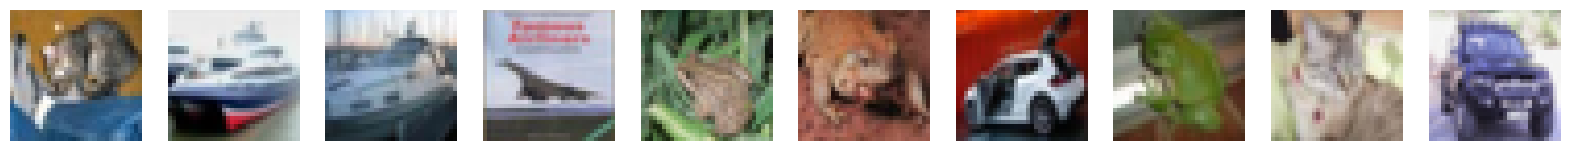

In [53]:
# Defining the standard image size to reduce the parameters of the model
data_transform = transforms.Compose([
                                     transforms.Resize(32),
                                     transforms.ToTensor(),])
# Applying the transformation on train and test set
train_set = datasets.CIFAR10('.', 
                      train=True, 
                      transform=data_transform, 
                      download=True)

test_set = datasets.CIFAR10('.', 
                      train=False, 
                      transform=data_transform, 
                      download=True)

# Using a data loader for each batch size
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True,
                          num_workers=0)

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True,
                          num_workers=0)

fig, axs = plt.subplots(1,10, figsize=(20, 2))

for i in range(10):
  data, label = test_set[i]
  axs[i].imshow(data.permute((1,2,0)))
  axs[i].axis('off')

As one can see the images are not in HD, because it they were the model would rely on more computational capacity, só images of size 32 reduces that.

In [54]:
criterion = nn.CrossEntropyLoss().to(args['device'])

from torch import optim
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

One will be using Cross entropy loss, as it is well-suited for classification problems, as it measures the dissimilarity between the predicted class probabilities and the true class labels. It encourages the model to assign high probabilities to the correct class and low probabilities to incorrect classes.

Adam is an optimizer that works well on image convolution as a basic optimizer, one could test other optimizer, but that would take a lot more time, since,**Spoiler alert** 32 epochs takes 8 min to train in my local machine (GT-1030 2gb GDDR5, 16gbRAM and i5-7500).

In [55]:
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def train(train_loader, net, epoch):

  # Training mode
  net.train()
  
  start = time.time()
  
  epoch_loss  = []
  pred_list, label_list = [], []
  for batch in train_loader:
    
    data, label = batch
    
    # Cast do data na GPU
    data = data.to(args['device'])
    label = label.to(args['device'])
    
    # Forward
    ypred = net(data)
    loss = criterion(ypred, label)
    epoch_loss.append(loss.cpu().data)

    _, pred = tc.max(ypred, axis=1)
    pred_list.append(pred.cpu().numpy())
    label_list.append(label.cpu().numpy())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
  epoch_loss = np.asarray(epoch_loss)
  pred_list = np.concatenate(pred_list)
  label_list = np.concatenate(label_list)
  label_encoder = LabelEncoder()
  
  ACC_train = []
  # Apply the LabelEncoder to pred_list and label_list
  pred_list_encoded = label_encoder.fit_transform(pred_list)
  label_list_encoded = label_encoder.transform(label_list)
  # ACC score
  acc = accuracy_score(pred_list_encoded, label_list_encoded)
  ACC_train.append(acc*100)

  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))
  ACC_train = np.asarray(ACC_train)
  
  return epoch_loss.mean(), ACC_train.mean()
    

In [56]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []
  pred_list, label_list = [], []
  with tc.no_grad(): 
    for batch in test_loader:

      data, label = batch

      # Cast do data na GPU
      data = data.to(args['device'])
      label = label.to(args['device'])

      # Forward
      ypred = net(data)
      loss = criterion(ypred, label)
      epoch_loss.append(loss.cpu().data)

      _, pred = tc.max(ypred, axis=1)
      pred_list.append(pred.cpu().numpy())
      label_list.append(label.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)
  pred_list = np.concatenate(pred_list)
  label_list = np.concatenate(label_list)
  label_encoder = LabelEncoder()
  
  # Apply the LabelEncoder to pred_list and label_list
  pred_list_encoded = label_encoder.fit_transform(pred_list)
  label_list_encoded = label_encoder.transform(label_list)
  # ACC score
  ACC_val = []

  acc = accuracy_score(pred_list_encoded, label_list_encoded)
  ACC_val.append(acc*100)

  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))
  ACC_val = np.asarray(ACC_val)
  return epoch_loss.mean(), ACC_val.mean()

In [57]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):
  
  # Train
  train_losses.append(train(train_loader, net, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 1.8752 +/- 0.1390, Acc: 33.84, Time: 10.62
********** Validate **********
Epoch 0, Loss: 1.7726 +/- 0.0424, Acc: 38.18, Time: 2.01

#################### Train ####################
Epoch 1, Loss: 1.6678 +/- 0.0405, Acc: 41.79, Time: 10.42
********** Validate **********
Epoch 1, Loss: 1.6542 +/- 0.0297, Acc: 42.51, Time: 2.05

#################### Train ####################
Epoch 2, Loss: 1.5696 +/- 0.0339, Acc: 45.50, Time: 10.29
********** Validate **********
Epoch 2, Loss: 1.5909 +/- 0.0245, Acc: 45.13, Time: 2.05

#################### Train ####################
Epoch 3, Loss: 1.5009 +/- 0.0320, Acc: 47.73, Time: 10.18
********** Validate **********
Epoch 3, Loss: 1.6048 +/- 0.0295, Acc: 44.87, Time: 2.11

#################### Train ####################
Epoch 4, Loss: 1.4420 +/- 0.0317, Acc: 49.75, Time: 10.19
********** Validate **********
Epoch 4, Loss: 1.4636 +/- 0.0392, Acc: 49.12, Time: 2.25

#################### Trai

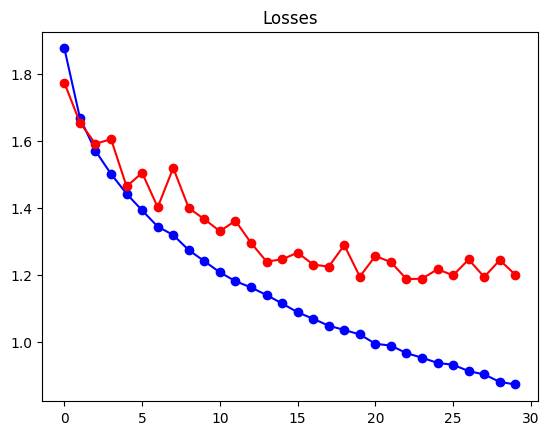

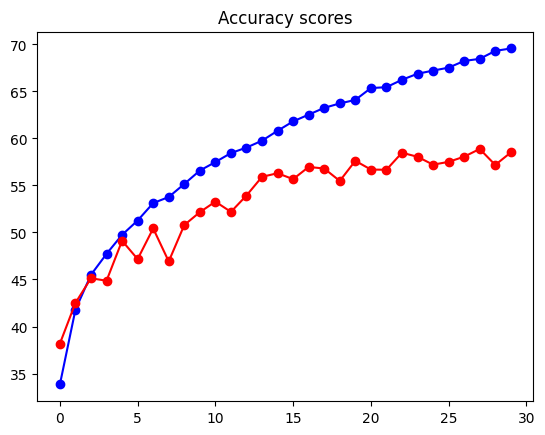

In [78]:
train_loss = [point[0] for point in train_losses]
train_accuracy = [point[1] for point in train_losses]

test_loss = [point[0] for point in test_losses]
test_accuracy = [point[1] for point in test_losses]


plt.figure()
plt.title('Losses')
plt.plot(train_loss, marker='o', linestyle='-', color='b', label='train loss')
plt.plot(test_loss, marker='o', linestyle='-', color='r', label='test loss')


plt.figure()
plt.title('Accuracy scores')
plt.plot(train_accuracy, marker='o', linestyle='-', color='b', label='train ACC')
plt.plot(test_accuracy, marker='o', linestyle='-', color='r', label='test ACC')


In [79]:
#saving the model dict to avoid another 8min training session
tc.save(net.state_dict(), 'model.pth')
#loading the dict of the already trained CNN
net.load_state_dict(tc.load('model.pth'))

<All keys matched successfully>

The model did not converged and also overfitted after 30 epochs. The Acc values for the validation were not bigger than 75%, making this model a not good classifier. This took a long time, was not worth the resources and made a bad result. A way to avoid the unknowing is to use an already trained model, with a better architecture, but that better model could also use resources that one does not has, so extracting its characteristics and doing a fine tunning process, could be a more efficient way.

# Extracting characteristics

One thing that could be done to avoid the long process of training is to pick-up an already trained model. That is a shortcut to the process, but the dataset one plans to use that model, must have the **same transformation process** as the dataset that the "picked model" was trained on.

One will use a pre-trained model with the same dataset transformed in a different way.

In [17]:
# Implementação e treinamento da rede
import torch as tc
from torch import nn, optim

# Carregamento de Dados e Modelos
from torch.utils.data import DataLoader
from torchvision import datasets, models
from torchvision import transforms

# Plots e análises
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time, os

%matplotlib inline

# Configurando hiperparâmetros.
args = {
    'epoch_num': 5,      # Número de épocas.
    'lr': 1e-3,           # Taxa de aprendizado.
    'weight_decay': 8e-4, # Penalidade L2 (Regularização).
    'batch_size': 20,     # Tamanho do batch.
}

# Definindo dispositivo de hardware
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

cuda


In [18]:
# these are the transformations done in the imagenet dataset
# https://github.com/pytorch/examples/blob/main/imagenet/main.py
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
 #at main.py line 233 and 234
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
    #these are the mean and std from the pixels of the images
])

# Applying the transformation on train and test set
train_set = datasets.CIFAR10('.', 
                      train=True, 
                      transform=data_transform, 
                      download=True)

test_set = datasets.CIFAR10('.', 
                      train=False, 
                      transform=data_transform, 
                      download=False)

train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True,
                          num_workers=2)

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True,
                          num_workers=2)


Files already downloaded and verified


Now one will use the already trained model, but will fine tune the vgg16 model to the data one currently has.

In [19]:
from torchvision import models
vgg16 = models.vgg16_bn(pretrained=True).to(args['device'])
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

This is a bigger and more powerful model than the last CNN one used before. The last Linear layer of the classifier: Sequential object, along with the Dropout and ReLU Layers, since those area dapted for another dataset. One will have a classifier object with [0:3]

In [20]:
list(vgg16.children())[-1][:-3]

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)

In [25]:
# redefining the classifier object

vgg16.classifier = nn.Sequential(list(vgg16.children())[-1][:-3]).to(args['device'])
vgg16


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [31]:
def extractor(net, loader):

  # Evaluation mode
  net.eval()

  feat_list, label_list = [], []
  with tc.no_grad(): 
    for k, batch in enumerate(loader):
      print('\r--{0}/{1}--'.format(k, len(loader)), end='', flush=True)

      data, label = batch

      # Cast do data na GPU
      data = data.to(args['device'])
      label = label.to(args['device'])

      # Extração
      characteristic = net(data)
      feat_list.append(characteristic.detach().cpu().numpy())
      label_list.append(label.detach().cpu().numpy())

  feat_list    = np.asarray(feat_list)
  feat_list    = np.reshape(feat_list, (feat_list.shape[0]*feat_list.shape[1], feat_list.shape[2]))

  label_list  = np.asarray(label_list).ravel()
 
  return feat_list, label_list

If one had more computational power one could use this model to evaluate the images, by loading the data into it using the code bellow.

In [32]:
'''
print('Load train')
train_X, train_Y = characteristics_extractor(vgg16, train_loader)
print('\nLoad test')
test_X,  test_Y  = characteristics_extractor(vgg16, test_loader)'''

"\nprint('Load train')\ntrain_X, train_Y = characteristics_extractor(vgg16, train_loader)\nprint('\nLoad test')\ntest_X,  test_Y  = characteristics_extractor(vgg16, test_loader)"

Using batch_size=20 with the same other hyperparameters, one would take 4 to 5 hours to load the train set and another hour to evaluate. Besides, this process is common, to deal with different datasets, allowing one to adapt a more robust model to the problem one has.

# Conclusions

With this notebook one can endeavor in the basics of CNN applied to image pattern classification, detection and segmentation.